# Saving and loading previous models

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper
import fc_model

In [2]:

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

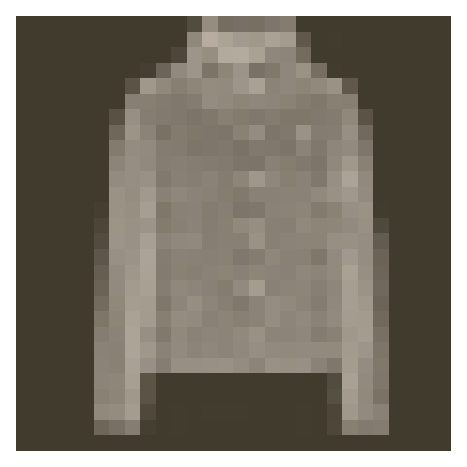

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0, :])

# Train a network

In [4]:
# Create the network, define the criterion and optimizer
model = fc_model.Network(784, 10, [512, 256, 128])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
fc_model.train(model, trainloader, testloader, criterion, optimizer, epochs=2)

Epoch: 1/2..  Training Loss: 1.672..  Test Loss: 1.035..  Test Accuracy: 0.611
Epoch: 1/2..  Training Loss: 1.056..  Test Loss: 0.771..  Test Accuracy: 0.721
Epoch: 1/2..  Training Loss: 0.858..  Test Loss: 0.687..  Test Accuracy: 0.737
Epoch: 1/2..  Training Loss: 0.771..  Test Loss: 0.625..  Test Accuracy: 0.759
Epoch: 1/2..  Training Loss: 0.768..  Test Loss: 0.636..  Test Accuracy: 0.755
Epoch: 1/2..  Training Loss: 0.750..  Test Loss: 0.656..  Test Accuracy: 0.733
Epoch: 1/2..  Training Loss: 0.674..  Test Loss: 0.591..  Test Accuracy: 0.777
Epoch: 1/2..  Training Loss: 0.658..  Test Loss: 0.556..  Test Accuracy: 0.792
Epoch: 1/2..  Training Loss: 0.632..  Test Loss: 0.559..  Test Accuracy: 0.794
Epoch: 1/2..  Training Loss: 0.659..  Test Loss: 0.540..  Test Accuracy: 0.797
Epoch: 1/2..  Training Loss: 0.620..  Test Loss: 0.538..  Test Accuracy: 0.797
Epoch: 1/2..  Training Loss: 0.635..  Test Loss: 0.516..  Test Accuracy: 0.806
Epoch: 1/2..  Training Loss: 0.623..  Test Loss: 0.5

# Saving and Loading

In [6]:
print(model)
print(model.state_dict().keys())

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [7]:
torch.save(model.state_dict(), "checkpoint.pth")

In [11]:
state_dict = torch.load("checkpoint.pth")
print(state_dict.keys())

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [12]:
model.load_state_dict(state_dict)

<All keys matched successfully>

# Different model
`model = fc_model.Network(784, 10, [400, 200, 100])`
`model.load_state_dict(state_dict)` # WILL THROW AN ERROR BECAUSE THE ARCHITECTURE

In [13]:
checkpoint = {"input_size": 784,
             "output_size": 10,
             "hidden_layers": [each.out_features for each in model.hidden_layers],
             "state_dict": model.state_dict()}

torch.save(checkpoint, "checkpoint.pth")

In [14]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = fc_model.Network(checkpoint["input_size"],
                             checkpoint["output_size"],
                             checkpoint["hidden_layers"])
    model.load_state_dict(checkpoint["state_dict"])
    
    return model

In [15]:
model = load_checkpoint("checkpoint.pth")
print(model)

NameError: name 'load_checkpoint' is not defined